In [7]:
#reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import seaborn as sns

ds= pd.read_csv('breast-cancer.csv')
np.set_printoptions(suppress=True)

#X= ds.iloc[:, 1:].values
y= ds.iloc[:, 0].values



In [8]:
#categorical data
#malignant-> 1
#benign-> 0

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


NameError: name 'Plotter' is not defined

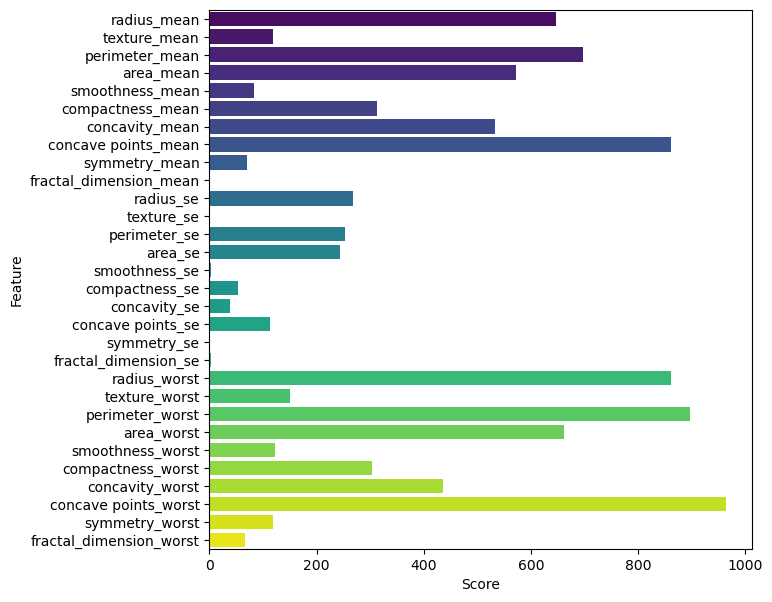

In [9]:

X = ds.drop('diagnosis', axis = 1)
Y = y
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')#Plotter function for aesthetics
plot

In [10]:
#Selection method
selection=featureScores[featureScores['Score']>=200]
selection=list(selection['Feature'])
selection.append('diagnosis')
#Adding the Level string to be used to make new data frame
new_ds=ds[selection]
#New dataframe with selected features
new_ds.head()
#Lets take a look at the first 5
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   perimeter_mean        569 non-null    float64
 2   area_mean             569 non-null    float64
 3   compactness_mean      569 non-null    float64
 4   concavity_mean        569 non-null    float64
 5   concave points_mean   569 non-null    float64
 6   radius_se             569 non-null    float64
 7   perimeter_se          569 non-null    float64
 8   area_se               569 non-null    float64
 9   radius_worst          569 non-null    float64
 10  perimeter_worst       569 non-null    float64
 11  area_worst            569 non-null    float64
 12  compactness_worst     569 non-null    float64
 13  concavity_worst       569 non-null    float64
 14  concave points_worst  569 non-null    float64
 15  diagnosis             5

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_ds.drop(['diagnosis'], axis=1), new_ds['diagnosis'], test_size=0.2, random_state=42)

In [12]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
#Logistic Regression
#  fitting logistic Regression on dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#prediction the test set result
y_pred = classifier.predict(X_test)
y_pred

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
cm

array([[69,  2],
       [ 2, 41]], dtype=int64)

In [13]:
pickle.dump(classifier, open('breast_cancer.pkl', 'wb'))
model = pickle.load(open('breast_cancer.pkl', 'rb'))
